# Model based approach

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

## 1) import the data

In [2]:
games = pd.read_csv("/Users/faycal/code/Agnes-Lain/game_one/raw_data/rawg_games.csv").copy()

In [3]:
games.head()

,Unnamed: 0,game_id,slug,name,description,released,rating,detail_ratings,ratings_count,suggestions_count,game_series_count,reviews_count,metacritic,game_platforms,game_genres,game_tags,developers,publishers
0,0,150724,game-500,......,<p>...... is a casual game developed by ixabri...,2016-11-12,0.00,4|recommended|1|100.0,1,5,0,1,NaN,171|Web,Casual,NaN,45057|ixabris,NaN
1,1,47782,polyfauna,PolyFauna,<p>PolyFauna is an experimental collaboration ...,2014-01-12,0.00,5|exceptional|1|100.0,1,326,0,1,NaN,"21|Android, 3|iOS",Indie,Experimental,23347|Radiohead,NaN
2,2,57224,tiny-toon-adventures-busters-hidden-treasure,Tiny Toon Adventures: Buster's Hidden Treasure,<p>Tiny Toon Adventures: Buster's Hidden Treas...,1993-02-07,4.18,"4|recommended|29|64.44, 5|exceptional|13|28.89...",43,252,0,45,NaN,167|Genesis,NaN,"Singleplayer, exclusive, true exclusive",1971|Konami Digital Entertainment,10691|Konami
3,3,31033,stronghold-crusader,Stronghold: Crusader,<p>Stronghold: Crusader is a strategy game dev...,2002-09-27,4.35,"4|recommended|49|60.49, 5|exceptional|30|37.04...",81,528,0,81,78.0,4|PC,Strategy,"exclusive, true exclusive",4393|FireFly Studios,11514|Gathering of Developers
4,4,35403,space-rangers-2-rise-of-the-dominators,Space Rangers 2: Rise of the Dominators,<p>Space Rangers 2: Rise of the Dominators is ...,2004-11-26,4.31,"5|exceptional|80|65.57, 4|recommended|24|19.67...",121,521,2,122,NaN,4|PC,"Adventure, RPG, Strategy, Arcade",NaN,5834|Elemental Games,13086|Excalibur Publishing


## 1) Clean the data

In [4]:
games['game_genres'] = games['game_genres'].astype(str)

In [5]:
games['game_tags'] = games['game_tags'].astype(str)

In [6]:
games = games.drop(['Unnamed: 0', 'description', 'released', 'rating', 'detail_ratings', 'ratings_count', 'suggestions_count', 'game_series_count', 'reviews_count', 'metacritic', 'game_platforms', 'developers', 'publishers'], axis=1)

In [7]:
games.head()

,game_id,slug,name,game_genres,game_tags
0,150724,game-500,......,Casual,nan
1,47782,polyfauna,PolyFauna,Indie,Experimental
2,57224,tiny-toon-adventures-busters-hidden-treasure,Tiny Toon Adventures: Buster's Hidden Treasure,nan,"Singleplayer, exclusive, true exclusive"
3,31033,stronghold-crusader,Stronghold: Crusader,Strategy,"exclusive, true exclusive"
4,35403,space-rangers-2-rise-of-the-dominators,Space Rangers 2: Rise of the Dominators,"Adventure, RPG, Strategy, Arcade",nan


In [8]:
games['game_genres'] = games['game_genres'].str.split(",")

In [9]:
def strip_list(series):
    series = [el.strip() for el in series]
    return series

In [10]:
games['game_genres'] = games['game_genres'].apply(strip_list)

In [11]:
games['game_tags'] = games['game_tags'].str.split(",")

In [12]:
games['game_tags'] = games['game_tags'].apply(strip_list)

## 3) Encode

In [13]:
def get_all_genre(series):
    genres = []
    for row in series:
        genres.append(row)
    return genres

In [14]:
def get_list_unique_values(series): 
    all_genres = get_all_genre(series)
    flat_genres = [item for sublist in all_genres for item in sublist]
    genres_unique = list(set(flat_genres))
    genres_unique.remove('nan')
    return genres_unique

In [15]:
genres_unique = get_list_unique_values(games['game_genres'])
tags_unique = get_list_unique_values(games['game_tags'])

In [16]:
genres_unique

['Arcade',
 'Strategy',
 'Card',
 'Sports',
 'Fighting',
 'Racing',
 'Simulation',
 'Massively Multiplayer',
 'Adventure',
 'Action',
 'Casual',
 'Board Games',
 'Family',
 'Indie',
 'Platformer',
 'Puzzle',
 'Educational',
 'RPG',
 'Shooter']

In [17]:
def create_genre_col(list, df):
    for el in list:
        df[el] = 0
    return df

In [18]:
games = create_genre_col(genres_unique, games)

In [19]:
games = create_genre_col(tags_unique, games)

In [20]:
games.head()

,game_id,slug,name,game_genres,game_tags,Arcade,Strategy,Card,Sports,Fighting,...,holiday,realism,Free to Play,Tactical RPG,witch,dialog,Soccer,Colony Sim,arena,enzo
0,150724,game-500,......,[Casual],[nan],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47782,polyfauna,PolyFauna,[Indie],[Experimental],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,57224,tiny-toon-adventures-busters-hidden-treasure,Tiny Toon Adventures: Buster's Hidden Treasure,[nan],"[Singleplayer, exclusive, true exclusive]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31033,stronghold-crusader,Stronghold: Crusader,[Strategy],"[exclusive, true exclusive]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35403,space-rangers-2-rise-of-the-dominators,Space Rangers 2: Rise of the Dominators,"[Adventure, RPG, Strategy, Arcade]",[nan],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
def my_ohe(df, liste, series):
    for row in range(len(df)):
        for el in liste:
            if el in series[row]:
                df[el][row] = 1
    return df

In [25]:
games = my_ohe(games, genres_unique, games['game_genres'])
games = my_ohe(games, tags_unique, games['game_tags'])

<ipython-input-21-d76c70f2a5a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[el][row] = 1


In [26]:
games.describe()

,game_id,Arcade,Strategy,Card,Sports,Fighting,Racing,Simulation,Massively Multiplayer,Adventure,...,holiday,realism,Free to Play,Tactical RPG,witch,dialog,Soccer,Colony Sim,arena,enzo
count,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,...,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000
mean,51528.152209,0.073576,0.207690,0.005588,0.052821,0.017696,0.048962,0.148616,0.035524,0.334220,...,0.000532,0.000399,0.063465,0.005455,0.000931,0.000133,0.004657,0.000665,0.001863,0.000133
std,100754.901567,0.261098,0.405681,0.074549,0.223690,0.131851,0.215803,0.355733,0.185113,0.471749,...,0.023065,0.019976,0.243813,0.073661,0.030506,0.011535,0.068086,0.025786,0.043122,0.011535
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10487.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18629.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40686.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,559120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
games.head()

,game_id,slug,name,game_genres,game_tags,Arcade,Strategy,Card,Sports,Fighting,...,holiday,realism,Free to Play,Tactical RPG,witch,dialog,Soccer,Colony Sim,arena,enzo
0,150724,game-500,......,[Casual],[nan],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47782,polyfauna,PolyFauna,[Indie],[Experimental],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,57224,tiny-toon-adventures-busters-hidden-treasure,Tiny Toon Adventures: Buster's Hidden Treasure,[nan],"[Singleplayer, exclusive, true exclusive]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31033,stronghold-crusader,Stronghold: Crusader,[Strategy],"[exclusive, true exclusive]",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35403,space-rangers-2-rise-of-the-dominators,Space Rangers 2: Rise of the Dominators,"[Adventure, RPG, Strategy, Arcade]",[nan],1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4) Dimensionality reduction

**Extract encoded columns**

In [28]:
games_encoded = games.drop(columns = ['game_id', 'slug', 'name', 'game_genres', 'game_tags'])

### A) SVD approach

In [34]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=120)
latent_df = svd.fit_transform(games_encoded)

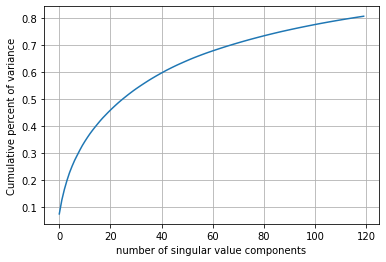

In [35]:
import matplotlib.pyplot as plt
# Plot variance as a function of the number of components.
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [39]:
# keep the first 125 number of latent components.
n = 125 
latent_df = pd.DataFrame(latent_df[:,0:n], index=games.name.tolist())
latent_df.shape

(7516, 120)

In [40]:
latent_df.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
......,0.119212,-0.192835,0.103560,-0.091744,-0.200846,-0.209148,0.039227,-0.088606,-0.140486,0.413671,...,0.014691,-0.002841,-0.001913,0.001729,-0.009103,-0.017272,0.001207,-0.004936,-0.013602,0.002044
PolyFauna,0.318410,-0.301780,0.136867,-0.153058,-0.258701,-0.129647,0.209084,0.373465,0.310721,-0.056022,...,0.009837,-0.022234,0.002461,0.007541,-0.000440,-0.002171,0.005611,-0.029367,0.015677,0.020316
Tiny Toon Adventures: Buster's Hidden Treasure,0.508715,-0.047588,0.036719,0.082325,-0.334299,0.027822,-0.286662,-0.339072,-0.045864,0.109872,...,-0.017211,-0.007777,-0.025312,0.008497,-0.008448,-0.016790,0.006842,-0.000330,0.001614,-0.004830
Stronghold: Crusader,0.140294,0.076537,0.344596,0.196173,-0.276194,0.373020,-0.336156,-0.138483,0.134591,-0.180421,...,-0.022642,-0.004538,-0.024120,0.005311,0.001960,-0.013494,0.026656,-0.032616,0.003581,-0.014454
Space Rangers 2: Rise of the Dominators,0.519218,-0.119408,-0.072953,0.572449,-0.525472,0.860938,0.346410,-0.315810,-0.074765,-0.294791,...,-0.009383,0.011145,0.032636,0.036760,-0.015785,-0.042995,0.019687,0.001554,-0.003277,-0.003937


In [47]:
latent_df.index[3]

'Stronghold: Crusader'

## 6) Apply cosine similarity in content

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

# Get the latent vectors for "Stronghold: Crusader" from content and collaborative matrices
v1 = np.array(latent_df.loc["Stronghold: Crusader"]).reshape(1, -1)

# Compute the cosine similartity of this movie with the others in the list
sim1 = cosine_similarity(latent_df, v1).reshape(-1)

In [53]:
dictDf = {'content': sim1}
recommendation_df = pd.DataFrame(dictDf, index = latent_df.index)

In [54]:
recommendation_df.sort_values('content', ascending=False, inplace=True)
recommendation_df.head(10)

,content
Stronghold: Crusader,1.000000
Stronghold,1.000000
Command & Conquer: Generals - Zero Hour,1.000000
Command & Conquer: Red Alert 2,1.000000
Command & Conquer: Red Alert - Retaliation,0.953843
Knowledge is Power: Decades,0.953843
Ecolibrium,0.865938
Warcraft 3: Reign of Chaos,0.865763
Fire Emblem: Three Houses,0.865763
Fire Emblem Awakening,0.865763
